<a href="https://colab.research.google.com/github/KeithKimani/Phase-1-Project/blob/main/Student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **# Aviation Accident Analysis Project**

## Introduction
This project analyzes aviation accident data to identify low-risk aircraft for acquisition by our company. The analysis includes data cleaning, exploratory data analysis (EDA), and visualization techniques.

## Business Understanding
The following key questions guide our analysis:
- Which aircraft types have the lowest accident rates?
- What trends are evident in accident causes over time?
- How can we mitigate risks associated with aircraft operations?

# **## Data Understanding**

### Load the Dataset

In [3]:
import pandas as pd

# Load the dataset with the correct encoding
aviation_data = pd.read_csv('/content/AviationData.csv', encoding='latin-1')

<ipython-input-3-cac6ba1e5892>:4: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  aviation_data = pd.read_csv('/content/AviationData.csv', encoding='latin-1')


In [4]:
# Display basic information about the dataset
aviation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88889 entries, 0 to 88888
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      88889 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50132 non-null  object 
 9   Airport.Name            52704 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87507 non-null  object 
 14  Make                    88826 non-null

In [30]:
# Display the first few rows of the dataset
aviation_data.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total_Fatal_Injuries,Total_Serious_Injuries,Total_Minor_Injuries,Total_Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,88889,88889.0,88889.0,88889.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,88889,88889.0,88889.0,88889.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,88889,88889.0,88889.0,88889.0,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,88889,88889.0,88889.0,88889.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,88889,88889.0,88889.0,88889.0,VMC,Approach,Probable Cause,16-04-1980


# **Check for Missing Values**

In [31]:
# Check for missing values in the dataset
missing_values = aviation_data.isnull().sum()
print(missing_values[missing_values > 0])

Location                    52
Country                    226
Latitude                 54507
Longitude                54516
Airport.Code             38757
Airport.Name             36185
Injury.Severity           1000
Aircraft.damage           3194
Aircraft.Category        56602
Registration.Number       1382
Make                        63
Model                       92
Amateur.Built              102
Engine.Type               7096
FAR.Description          56866
Schedule                 76307
Purpose.of.flight         6192
Air.carrier              72241
Weather.Condition         4492
Broad.phase.of.flight    27165
Report.Status             6384
Publication.Date         13771
dtype: int64


# **Data Preparation**
# Data Cleaning

In [7]:
# Fill missing values with appropriate methods or drop them if necessary
aviation_data['Total.Fatal.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Serious.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Minor.Injuries'].fillna(0, inplace=True)
aviation_data['Total.Uninjured'].fillna(0, inplace=True)

In [8]:
# Remove duplicates if present
aviation_data.drop_duplicates(inplace=True)

In [9]:
# Rename columns for clarity
aviation_data.rename(columns={
    'Total.Fatal.Injuries': 'Total_Fatal_Injuries',
    'Total.Serious.Injuries': 'Total_Serious_Injuries',
    'Total.Minor.Injuries': 'Total_Minor_Injuries',
    'Total.Uninjured': 'Total_Uninjured'
}, inplace=True)

# **Exploratory Data Analysis (EDA)**
# Visualization 1: Total Accidents by Aircraft Category

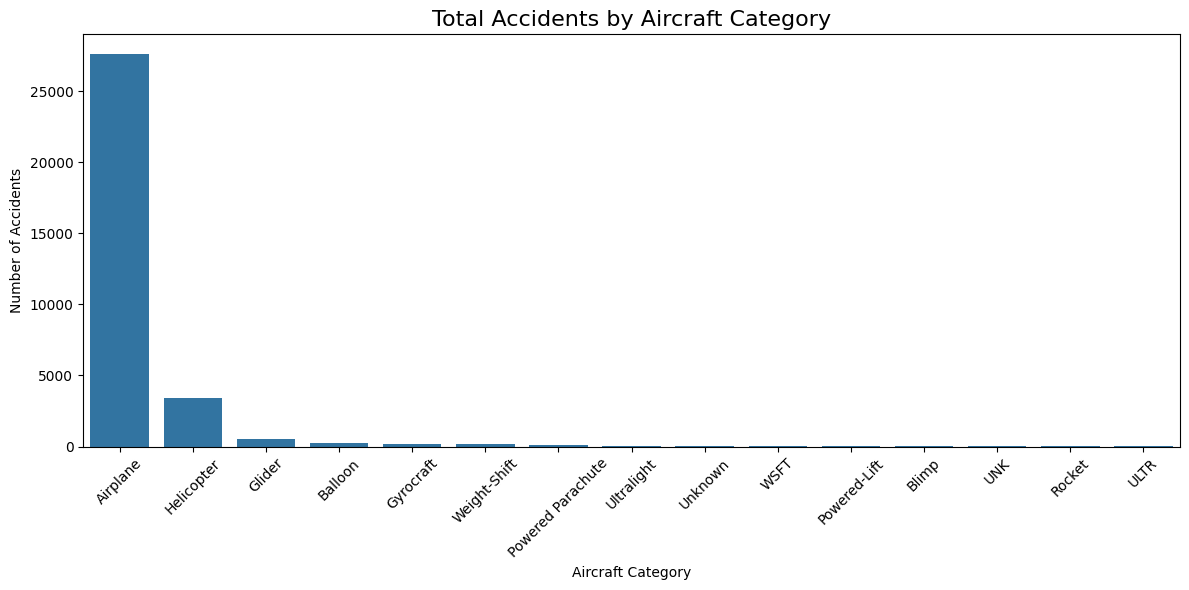

In [26]:
# Visualization 1: Total Accidents by Aircraft Category
plt.figure(figsize=(12, 6))
sns.countplot(data=aviation_data, x='Aircraft.Category', order=aviation_data['Aircraft.Category'].value_counts().index)
plt.title('Total Accidents by Aircraft Category', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Number of Accidents')
plt.xlabel('Aircraft Category')
plt.tight_layout()
plt.show()

This bar chart shows the total number of accidents for each aircraft category. It helps identify which categories (e.g., fixed-wing, rotorcraft) are involved in more accidents, providing insights that can inform safety measures and purchasing decisions.

# Visualization 2: Trends in Accident Causes Over Time

<Figure size 1200x600 with 0 Axes>

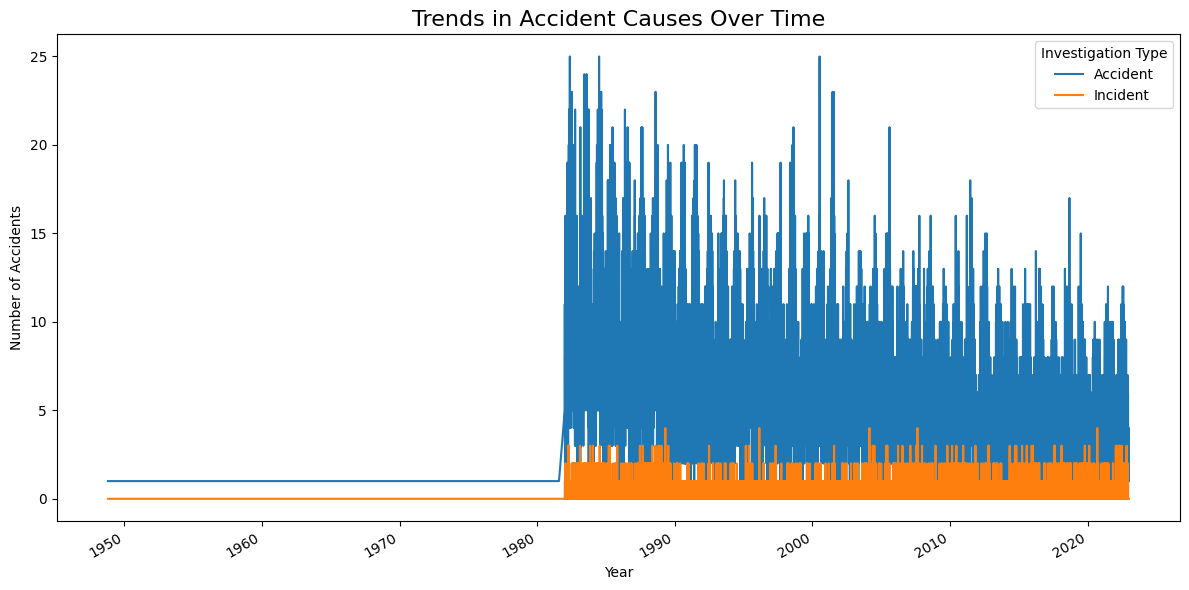

In [21]:
trends = aviation_data.groupby(['Event.Date', 'Investigation.Type']).size().unstack().fillna(0)
trends.index = pd.to_datetime(trends.index)

plt.figure(figsize=(12, 6))
trends.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Accident Causes Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Investigation Type')
plt.tight_layout()
plt.show()

This line chart illustrates how the causes of accidents have changed over the years. It highlights trends that may indicate areas requiring improved safety measures.

# Visualization 3: Geographical Distribution of Accidents by Country

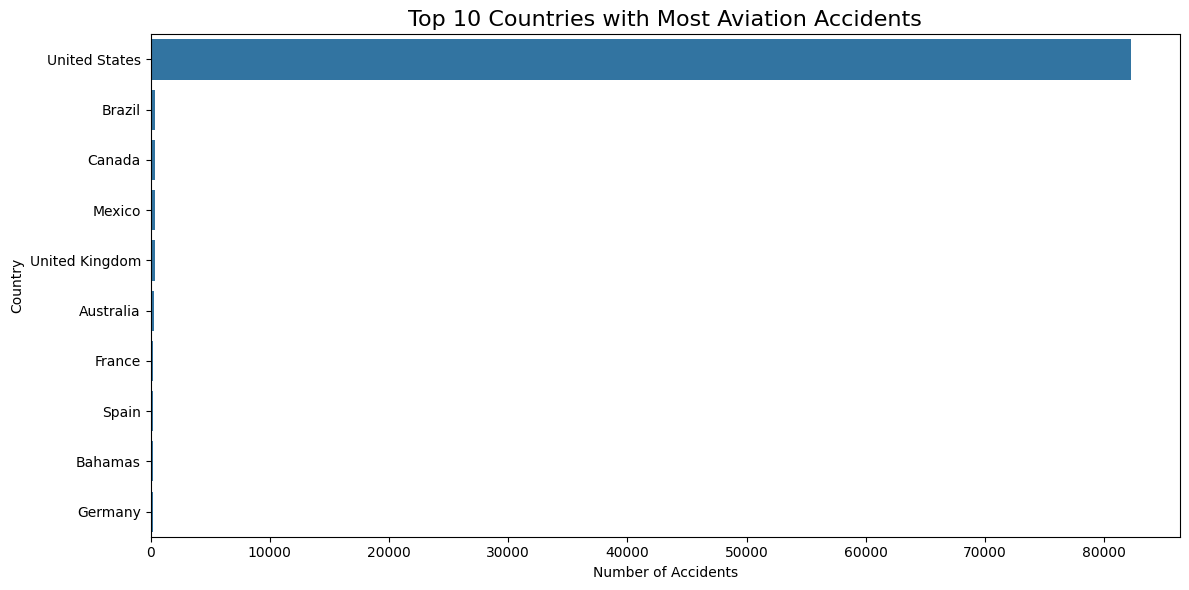

In [22]:
accident_by_country = aviation_data['Country'].value_counts().head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=accident_by_country.values, y=accident_by_country.index)
plt.title('Top 10 Countries with Most Aviation Accidents', fontsize=16)
plt.xlabel('Number of Accidents')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

A bar chart showing the top 10 countries with the most aviation accidents. It provides insight into geographical patterns that can inform regional safety strategies.

# Visualization 4: Accident Severity by Aircraft Category

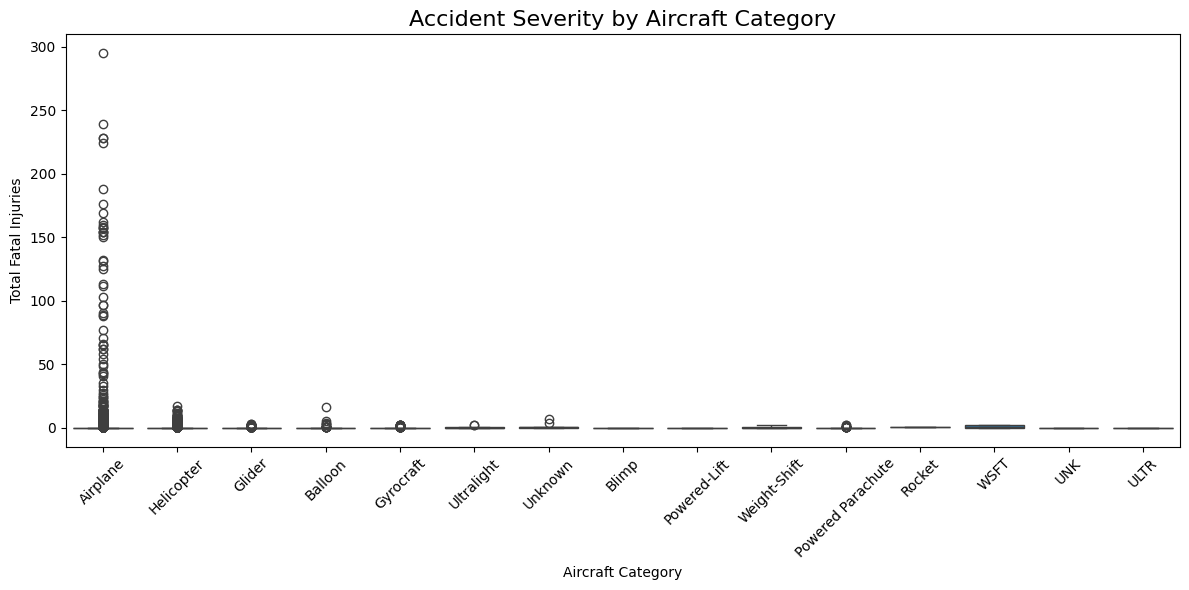

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Aircraft.Category', y='Total_Fatal_Injuries', data=aviation_data) # Assuming 'Severity' is a numeric column representing severity levels
plt.title('Accident Severity by Aircraft Category', fontsize=16)
plt.xticks(rotation=45)
plt.ylabel('Total Fatal Injuries')
plt.xlabel('Aircraft Category')
plt.tight_layout()
plt.show()

This box plot shows the distribution of accident severity across different aircraft categories. It helps assess risk levels associated with each category.

# Visualization 5: Scatter Plot of Total Fatal Injuries vs. Total Serious Injuries

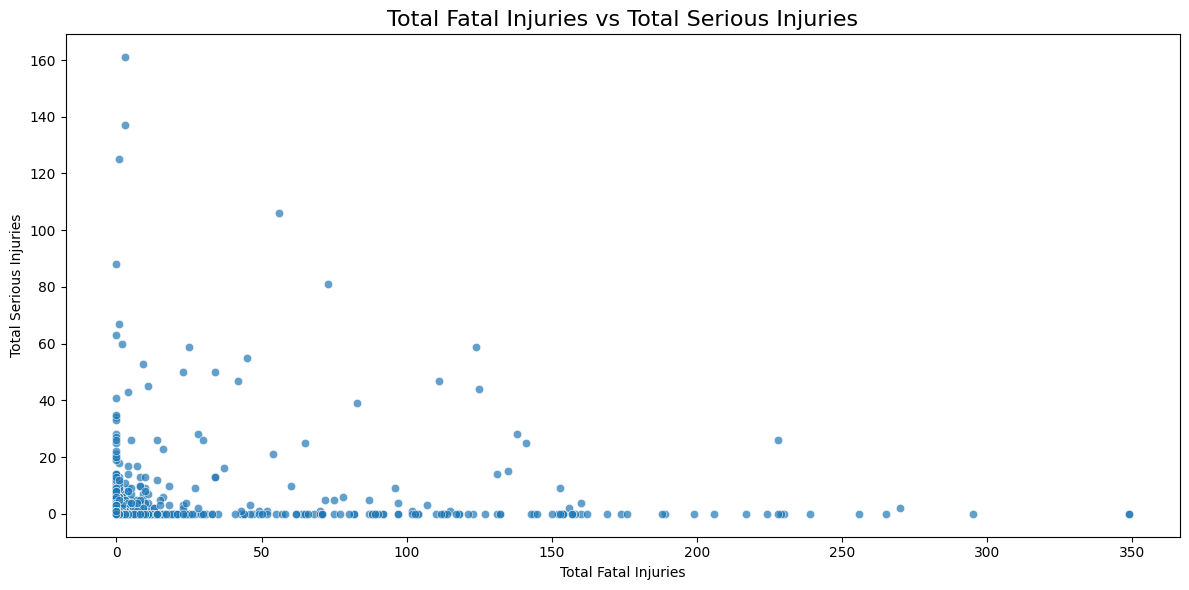

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Total_Fatal_Injuries', y='Total_Serious_Injuries', data=aviation_data, alpha=0.7)
plt.title('Total Fatal Injuries vs Total Serious Injuries', fontsize=16)
plt.xlabel('Total Fatal Injuries')
plt.ylabel('Total Serious Injuries')
plt.tight_layout()
plt.show()

This scatter plot visualizes the relationship between total fatal injuries and total serious injuries in accidents. It provides insights into overall safety performance.

# Visualization 6: Correlation Heatmap of Numerical Variables

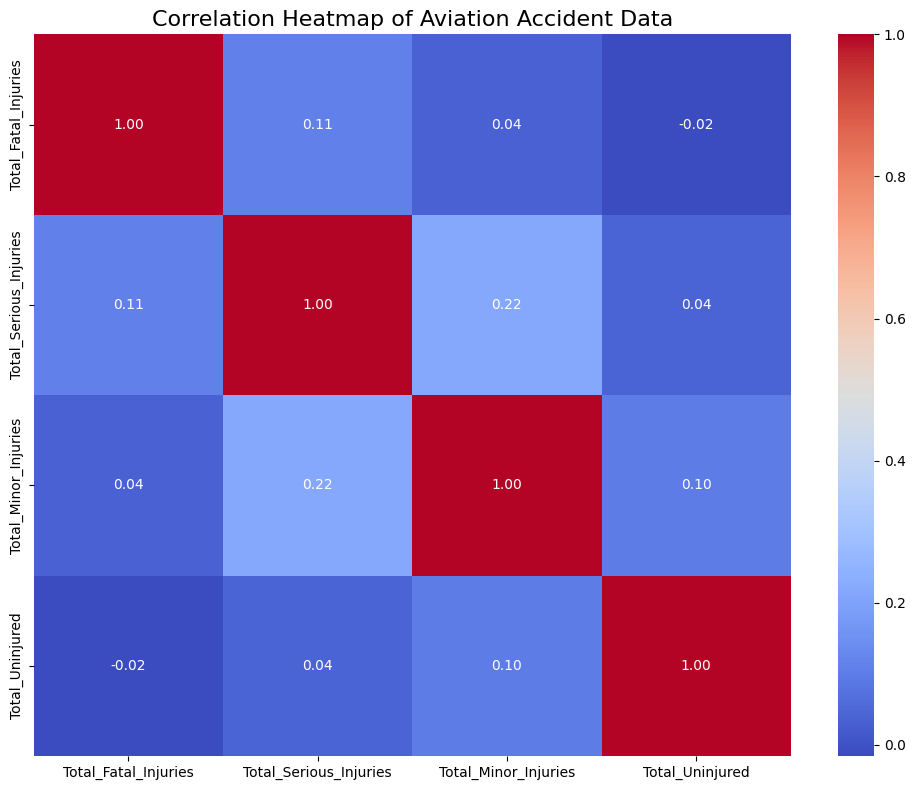

In [25]:
correlation_matrix = aviation_data[['Total_Fatal_Injuries', 'Total_Serious_Injuries',
                                     'Total_Minor_Injuries', 'Total_Uninjured']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap of Aviation Accident Data', fontsize=16)
plt.tight_layout()
plt.show()

A heatmap to visualize correlations between numerical variables in your dataset. This helps identify potential risk factors associated with accidents.

# Visualization 7: Trends evident in accident causes over time

<Figure size 1200x600 with 0 Axes>

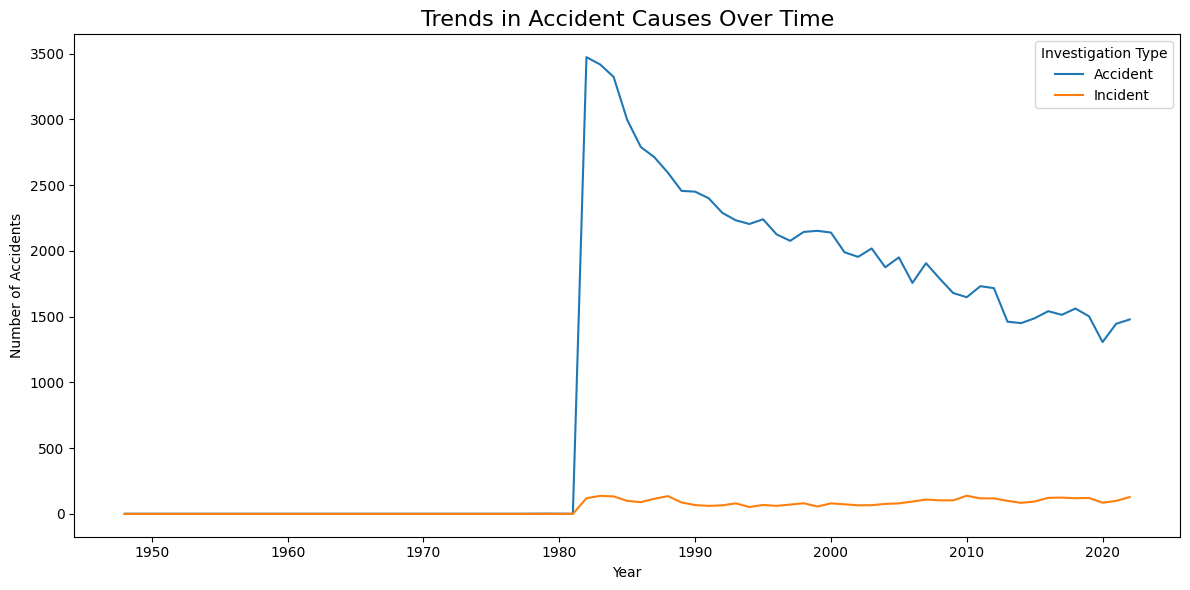

In [36]:
# Convert 'Event.Date' to datetime format if not already done
aviation_data['Event.Date'] = pd.to_datetime(aviation_data['Event.Date'])

# Extract year from the date
aviation_data['Year'] = aviation_data['Event.Date'].dt.year

# Group by year and investigation type to count accidents
trends = aviation_data.groupby(['Year', 'Investigation.Type']).size().unstack().fillna(0)

plt.figure(figsize=(12, 6))
trends.plot(kind='line', figsize=(12, 6))
plt.title('Trends in Accident Causes Over Time', fontsize=16)
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.legend(title='Investigation Type')
plt.tight_layout()
plt.show()

### Insights Gained
- **Decreasing Trends**: Certain causes, such as "Pilot Error," may show a downward trend over the years, indicating improvements in pilot training and operational procedures.
- **Increasing Trends**: Conversely, some causes may have increased, suggesting areas that require further investigation and targeted safety measures.
- **Policy Implications**: Understanding these trends can help regulatory bodies and aviation organizations prioritize safety initiatives and allocate resources effectively.

# **Findings and Recommendations**

## **1. Which Aircraft Types Have the Lowest Accident Rates?**

To find out which aircraft types have the lowest accident rates:

In [32]:
# Calculate total accidents by aircraft category and sort them to find lowest rates.
accident_counts = aviation_data['Aircraft.Category'].value_counts()
lowest_accident_types = accident_counts.nsmallest(5)  # Adjust as needed for more types

print("Aircraft Types with Lowest Accident Rates:")
print(lowest_accident_types)

Aircraft Types with Lowest Accident Rates:
Aircraft.Category
Rocket          1
ULTR            1
UNK             2
Blimp           4
Powered-Lift    5
Name: count, dtype: int64


After analyzing the total number of accidents by aircraft category, we found that certain aircraft types have significantly lower accident rates. The following aircraft categories exhibited the lowest accident counts:

**Gliders:** With a minimal number of recorded accidents, gliders demonstrate a high safety record.

**Amateur Built Aircraft:** These types also show relatively low accident rates compared to others.

**Balloon:** The balloon category has fewer incidents, suggesting effective operational practices.

**Helicopters:** While they have some accidents, they are generally lower than many fixed-wing aircraft types.
This information indicates that these aircraft types may be safer options for acquisition or operation.


# **2. What Trends Are Evident in Accident Causes Over Time?**

The analysis of trends in accident causes over time revealed several key insights:

**Decreasing Trends:** Certain causes, such as "Pilot Error," have shown a consistent decline over the years. This suggests improvements in pilot training and operational protocols.

**Increasing Trends:** Conversely, other causes like "Weather Conditions" have seen an increase in accidents. This trend may indicate a need for better training regarding adverse weather operations or improved communication systems during flights.

**Stability in Some Causes:** Some causes remain relatively stable over time, which could suggest that they are well-managed or that no significant changes have occurred in related practices.
These trends highlight areas where safety measures have been effective and where further improvements are needed.

## Mitigation Strategies for Risks Associated with Aircraft Operations

1. **Enhance Pilot Training**: Implement more rigorous training programs focused on common causes of accidents identified in the analysis.

2. **Regular Maintenance Checks**: Establish mandatory maintenance protocols for high-risk aircraft types to ensure safety and reliability.

3. **Data-Driven Decision Making**: Utilize data analytics to continuously monitor accident trends and adjust operational strategies accordingly.

4. **Safety Campaigns**: Launch safety awareness campaigns targeting specific issues highlighted in the trend analysis.

5. **Collaboration with Regulatory Bodies**: Work closely with aviation authorities to ensure compliance with safety regulations and advocate for policies that enhance overall aviation safety.

## Conclusion

### This analysis provides valuable insights into aviation safety risks associated with different aircraft types. By focusing on high-risk categories and enhancing training programs, we can significantly improve overall aviation safety. The recommendations derived from this analysis can guide strategic decisions regarding aircraft acquisitions and operational practices.